## OVERVIEW OF OSEMiN

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>

<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>


> <font size=2em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS

**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  





## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

<div style="display:block;border-bottom:solid red 3px;padding:1.4em;color:red;font-size:30pt;display:inline-block;line-height:1.5em;">
DELETE THIS CELL AND EVERYTHING ABOVE FROM YOUR FINAL NOTEBOOK
</div>

# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time:
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

Cyrptocurrencies have grown in popularity and market capitalization as corporations, retail investors, and individuals adopt them as means of transactions and as a store of value. Bitcoin, introduced to the world in 2008 was the first cryptocurrency and still the largest as a percentage of market share. However, Ethereum and a host of other coins have been making their way into the mainstream. 

One of the primary concerns that regulators and investors have with cryptocurrencies is their association with malicious activity. Because transactions are anonymous and decentralized, they became useful for purchasing goods and services on dark web markets like Silk Road. With anonymous transactions came fraud. Since users have no way of verrifying who is on the other end of the transaction, people were regularly 'scammed' and defrauded. For widespread adoption, this obviously presents a concern because people need to trust that their transactions are being properly executed.

The model I have designed adds a safeguard for transferring ethereum. If the model believs the transaction may be fraudelent, it will warn the user before they confirm the transaction. Think of this as an equivalent service to when your bank alerts you that their may have been a suspicious transaction on your credit card. Ideally, this service would be built into an existing cryptocurrency wallet. 


# OBTAIN

In [7]:
# Load in the data from Kaggle
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('transaction_dataset.csv')

In [8]:
# Make sure it was loaded correctly

display(df.shape)
df.head()

(9841, 51)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [9]:
# Replace spaces with underscores on column names to make it more 'pythonic'

df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.replace(' ', '_')

In [10]:
df.head()

,Unnamed:_0,Index,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [12]:
# Drop unnecessary columns

df = df.drop(columns=['Unnamed:_0', 'Index'], axis=1)

# SCRUB

## Check for duplicate values

In [13]:
# Check for complete duplicates

df.duplicated().sum()

18

In [14]:
df[df.duplicated(keep=False)]

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
2908,0x4c13f6966dc24c92489344f0fd6f0e61f3489b84,0,5980.35,18633.46,498256.47,21,20,0,2,18,1.990000,499.990000,129.970060,0.000669,499.989580,123.780506,0.0,0.0,0.0,41,2599.390622,2599.401197,0.0,0.010575,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2909,0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1,0,7042.64,2694.86,80594.87,8,9,0,8,7,0.001000,2.812069,0.880369,0.000000,2.060330,0.989884,0.0,0.0,0.0,17,7.919068,7.923318,0.0,0.004250,3.0,1.404019e+02,1.401027e+02,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.299173,1.401027e+02,70.200930,140.102687,1.401027e+02,140.102687,0.0,0.0,0.0,1.0,2.0,Golem,OmiseGO
2911,0x4c268c7b1d51b369153d6f1f28c61b15f0e17746,0,0.00,0.00,0.00,0,1,0,1,0,0.250303,0.250303,0.250303,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.250303,0.0,0.250303,5.0,7.221897e+01,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.000000,6.492189e+01,14.443795,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,None,Livepeer Token
2912,0x4c26a3c12a64f33a3546fbb206c5365ce8e82c20,0,0.00,0.00,0.00,0,1,0,1,0,0.804725,0.804725,0.804725,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.000000,0.804725,0.0,0.804725,5.0,1.900557e+02,0.000000e+00,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.000000,1.715882e+02,38.011146,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,None,Livepeer Token
2914,0x4c27438a77738153f6cf3ed890b2817d52ebf584,0,9695.78,1133.48,257022.97,14,107,0,6,1,1.027784,278.228000,62.635543,0.008543,2582.449433,478.714007,0.0,0.0,0.0,121,6701.996102,6702.003081,0.0,0.006979,1.0,6.000000e+02,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,600.000000,6.000000e+02,600.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,None,AICRYPTO
2915,0x4c391cc032c9107b596267610a05262c90fc2df7,0,161.24,0.92,324.32,2,2,0,2,2,3.662241,97.337759,50.500000,1.499454,99.499562,50.499508,0.0,0.0,0.0,4,100.999016,101.000000,0.0,0.000984,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2916,0x4c4a03e100b4b104355edc4c50ce12b9a2879547,0,6783.50,48019.41,1028223.27,10,20,0,7,2,0.000300,56.488945,19.423552,0.000000,156.470945,38.846694,0.0,0.0,0.0,30,388.466945,388.471045,0.0,0.004100,2.0,8.839541e-01,8.839541e-01,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.883954,8.839540e-01,0.883954,0.883954,8.839540e-01,0.883954,0.0,0.0,0.0,1.0,1.0,OmiseGO,OmiseGO
2917,0x4c4da560350e302232a184c8fa16b126a772c326,0,0.00,0.00,5.70,1,1,0,1,1,0.082618,0.082618,0.082618,0.082147,0.082147,0.082147,0.0,0.0,0.0,2,0.082147,0.082618,0.0,0.000472,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2918,0x4c5b0709f66719861e7277c9dcda9175deb3d866,0,2.32,0.0

There are 18 full duplicates. Going to assume this was an error so will delete the 'last' version of the duplicate. They are all flagged as non-fraud

In [15]:
# Drop full duplicate values

df = df.drop_duplicates()

In [16]:
# Make sure there are no duplicate values left

df.duplicated().sum()

0

Since address must be unique, ensure that there are no duplicate address values

In [18]:
df[df.duplicated(subset=['Address'], keep=False) ]

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
2910,0x4c24af967901ec87a6644eb1ef42b680f58e67f5,0,3098.05,4755.44,382590.08,36,57,0,2,2,0.098677,1.021210,0.417608,0.098234,3.061040,0.660712,0.0,0.0,0.0,93,23.785623,23.803631,0.0,0.018009,3.0,2.255417e+02,0.00000,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.000000,2.050453e+02,75.180566,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,3.0,None,INS Promo
2913,0x4c271764eadcf0d07e5a937b2de290294c9d11c2,0,0.00,4695.70,319307.70,0,68,1,5,0,0.000000,1.001958,0.582851,0.000000,0.000000,0.000000,0.0,0.0,0.0,69,0.000000,39.633843,0.0,39.633843,2.0,1.332144e+00,0.00000,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.489173,8.429710e-01,0.666072,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,2.0,None,DATAcoin
2919,0x4c7520df888aa4569a37ac7d132f89c65821f0af,0,0.00,125704.72,628523.60,0,5,0,5,0,0.008496,1.500000,0.580704,0.000000,0.000000,0.000000,0.0,0.0,0.0,5,0.000000,2.903522,0.0,2.903522,7.0,4.576503e+02,0.00000,0.0,0.0,6.0,0.0,7.0,0.0,0.0,0.0,0.0,0.000000,3.957979e+02,65.378619,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,7.0,None,XENON
2920,0x4c77f6b01da78d053d5885e43bce5239b623dd3e,0,88542.07,8570.37,619849.82,4,31,0,14,2,2.000000,236.000000,48.003226,1.801281,1453.608300,372.023677,0.0,0.0,0.0,35,1488.094708,1488.100000,0.0,0.005292,9.0,8.174496e+02,0.00000,0.0,0.0,8.0,0.0,9.0,0.0,0.0,0.0,0.0,0.000000,6.000000e+02,90.827739,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,9.0,None,Livepeer Token
2921,0x4c7accc2689708892be29256fbe9d45a92f0aa97,0,1698.92,2127.67,793491.68,40,341,0,9,6,0.002000,2.779804,0.859973,0.000000,26.389848,7.330780,0.0,0.0,0.0,381,293.231188,293.250828,0.0,0.019641,12.0,2.248844e+04,100.77336,0.0,2.0,8.0,0.0,10.0,0.0,0.0,0.0,0.0,0.000000,2.007100e+04,2248.843592,0.77336,100.0,50.38668,0.0,0.0,0.0,2.0,10.0,OmiseGO,XENON
2924,0x4cad652b71519a7a68d05dada31122c4c9a5ed95,0,71349.06,14955.28,803222.32,10,6,0,4,8,0.001405,4.523699,1.643651,0.000000,2.163409,0.928332,0.0,0.0,0.0,16,9.283324,9.861906,0.0,0.578583,12.0,1.786914e+04,5196.00000,0.0,3.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.000000,4.853136e+03,1985.459570,0.00000,4920.0,1732.00000,0.0,0.0,0.0,3.0,5.0,Dao.Casino,Dao.Casino
2926,0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9,0,0.00,14218.10,412324.93,0,29,0,1,0,9.990000,40.000000,23.724138,0.000000,0.000000,0.000000,0.0,0.0,0.0,29,0.000000,688.000000,0.0,688.000000,21.0,4.598776e+06,0.00000,0.0,0.0,17.0,0.0,21.0,0.0,0.0,0.0,0.0,0.000000,4.590000e+06,218989.342600,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,21.0,None,Livepeer Token
2935,0x4c24af967901ec87a6644eb1ef42b680f58e67f5,0,3098.05,4755.44,382590.08,36,57,0,2,2,0.098677,1.021210,0.417608,0.098234,3.061040,0.660712,0.0,0.0,0.0,93,23.785623,23.803631,0.0,0.018009,3.0,2.255417e+02,0.00000,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.000000,2.050453e+02,75.180566,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,3.0,None,VIU
2938,0x4c271764eadcf0d07e5a937b2de290294c9d11c2,0,0.00,4695.70,319307.70,0,68,1,5,0,0.000000,1.001958,0

Only difference is the ERC20 most sent token type and ERC2 most rec token type. They are all non-fraud accounts. Every address is unique and there is no way of certifying which address has the correct information. Rather than randomly choosing to drop one set (7 duplicates), going to drop all of them.

In [20]:
df = df.drop_duplicates(subset='Address')

In [21]:
# Make sure there are no duplicate addresses

df.duplicated(subset='Address').sum()

0

## Check for Null Values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9816 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9816 non-null   object 
 1   FLAG                                                  9816 non-null   int64  
 2   Avg_min_between_sent_tnx                              9816 non-null   float64
 3   Avg_min_between_received_tnx                          9816 non-null   float64
 4   Time_Diff_between_first_and_last_(Mins)               9816 non-null   float64
 5   Sent_tnx                                              9816 non-null   int64  
 6   Received_Tnx                                          9816 non-null   int64  
 7   Number_of_Created_Contracts                           9816 non-null   int64  
 8   Unique_Received_From_Addresses                        9816

All of th ERC20 columns are missing aprox. 829 values. The first 24 columns which are only focused on ethereum do not contain any null values. 

Will also have to inspect if there are placeholder values for null values

<AxesSubplot:>

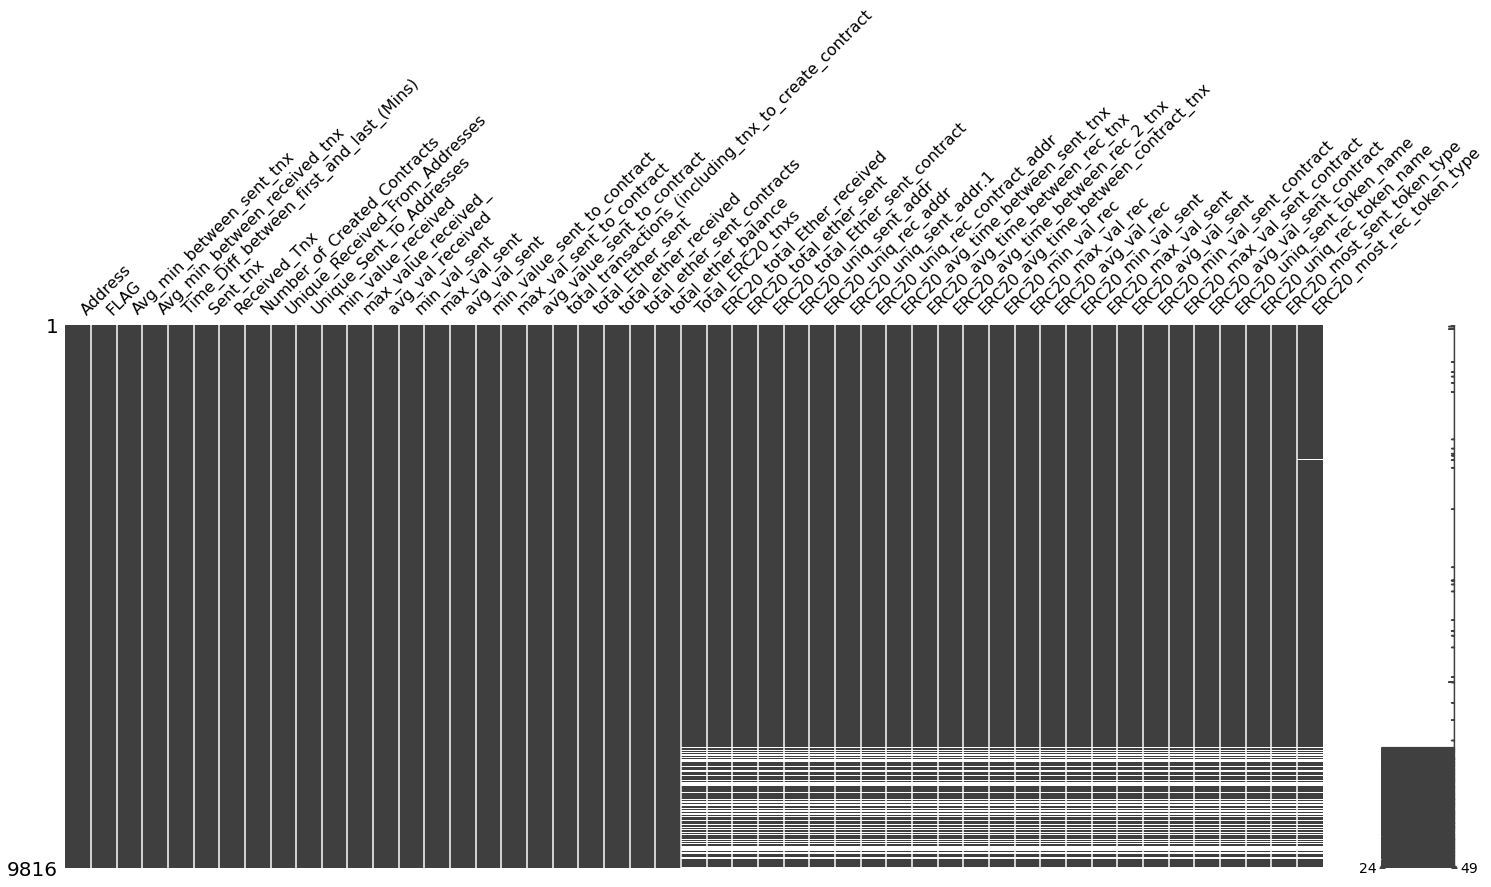

In [23]:
import missingno as msno
msno.matrix(df)

Most of the columns are completely filled in but the ERC tokens all contain null values in the same area. This makes me believe that fraudalent values may systematically be missing. Since they are not missing completely at random, will fill them in with a 'missing' value to indicate that they are missing and possibly uncover a pattern

<AxesSubplot:>

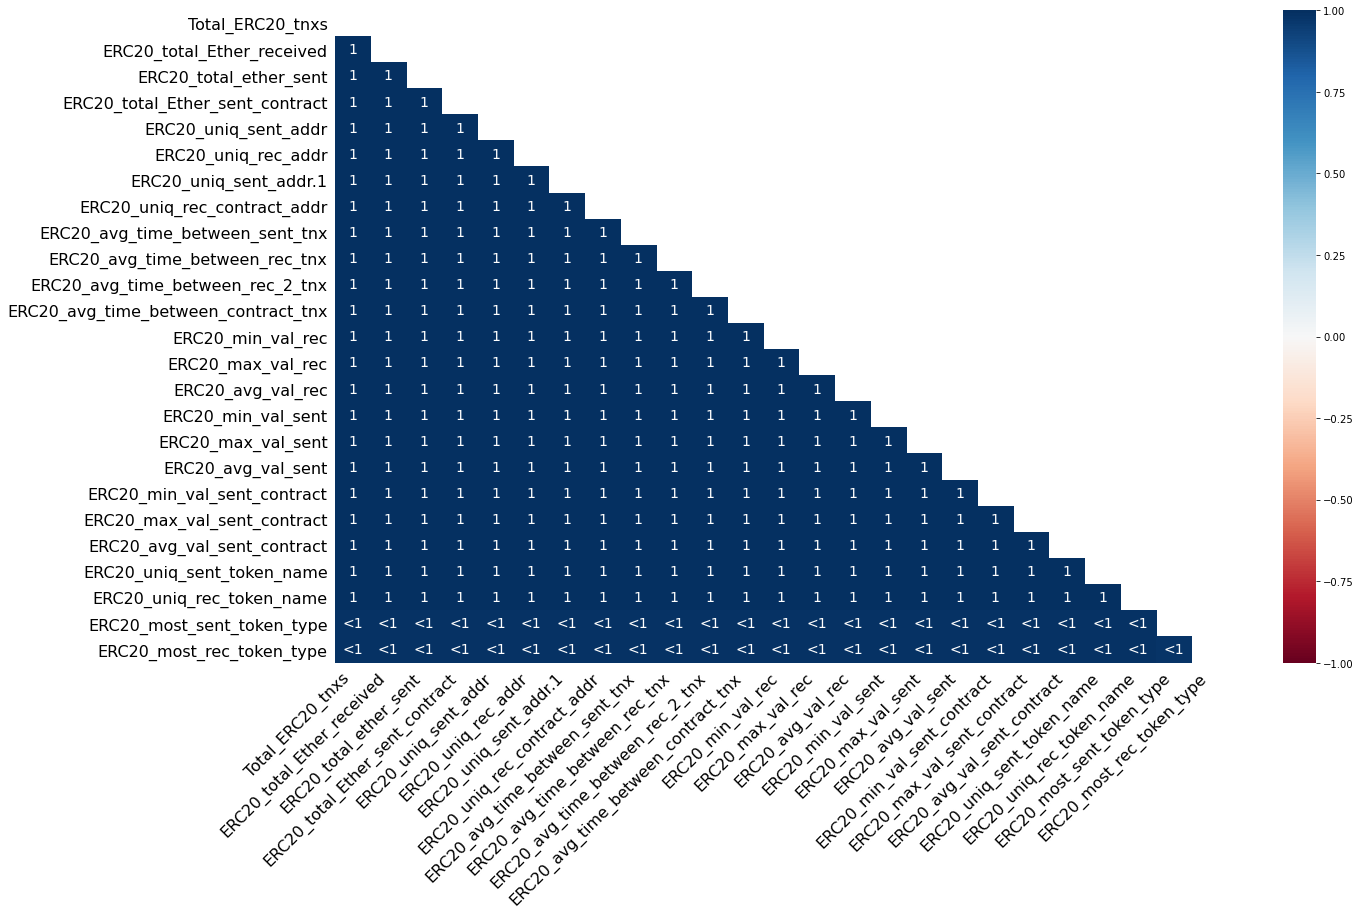

In [24]:
msno.heatmap(df)

The perfect correlation confirms that if one ERC value is missing, all of them will be classified as missing

In [25]:
# Check where in the dataset missing values appear

missing=list(df[df['FLAG']==1].index)

In [28]:
import numpy as np
np.array(missing)
print(np.min(missing))
np.max(missing)

7662


9840

It is clear based on the matrix that the fraud instances are consecutive and correspond with the missing ERC values. 

If I were to create a 'missing' class, the correlation with fraud would artificially be extremely high. For that reason, I will have to impute values or drop the entire column.

It makes sense that many of the fraud cases are missing values because a user may have had their account hacked and not been aware of transaction being made. For example, if a user connected their wallet to an exchange that was hacked and then a bad actor distributed ethereum from the hacked wallet, the user may not know exactly how much was sent out.

In [29]:
df_missing = df[df['FLAG']==1]

<AxesSubplot:>

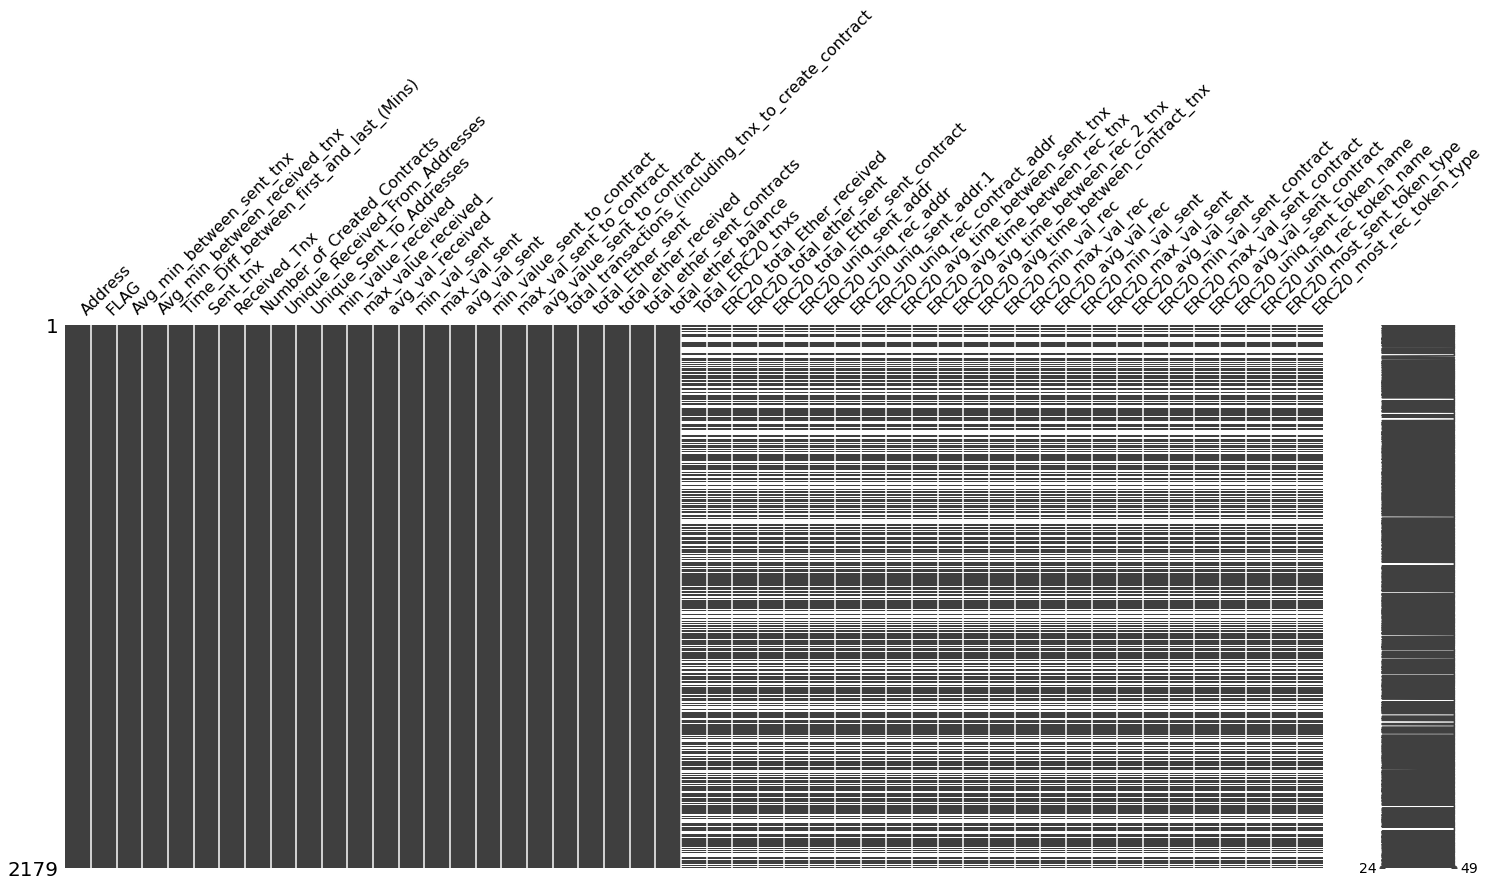

In [30]:
msno.matrix(df_missing)

In [31]:
df_missing.isna().sum()

Address                                                   0
FLAG                                                      0
Avg_min_between_sent_tnx                                  0
Avg_min_between_received_tnx                              0
Time_Diff_between_first_and_last_(Mins)                   0
Sent_tnx                                                  0
Received_Tnx                                              0
Number_of_Created_Contracts                               0
Unique_Received_From_Addresses                            0
Unique_Sent_To_Addresses                                  0
min_value_received                                        0
max_value_received_                                       0
avg_val_received                                          0
min_val_sent                                              0
max_val_sent                                              0
avg_val_sent                                              0
min_value_sent_to_contract              

In [32]:
# How many ERC values are missing

829/len(df_missing)

0.38044974759063793

Going to classify missing ERC values as 'missing' to demonstrate that they have meaning. Missing ERC value is interpreted as the wallet carrier does not use ERC tokens. 

In [36]:
df.loc[:,'Total_ERC20_tnxs':'ERC20_most_rec_token_type']=df.loc[:,'Total_ERC20_tnxs':'ERC20_most_rec_token_type'].fillna('Missing')

In [43]:
# Ensure that there are no remaining nan values

df.isna().sum()

Address                                                 0
FLAG                                                    0
Avg_min_between_sent_tnx                                0
Avg_min_between_received_tnx                            0
Time_Diff_between_first_and_last_(Mins)                 0
Sent_tnx                                                0
Received_Tnx                                            0
Number_of_Created_Contracts                             0
Unique_Received_From_Addresses                          0
Unique_Sent_To_Addresses                                0
min_value_received                                      0
max_value_received_                                     0
avg_val_received                                        0
min_val_sent                                            0
max_val_sent                                            0
avg_val_sent                                            0
min_value_sent_to_contract                              0
max_val_sent_t

## Feature Engineering

An example of fraud could be a bad actor gaining access to your wallet and sending the balance or certain number of tokens to their own wallet. Characteristics of this may look like: 
- Significantly larger max_val_sent than avg_val_sent because the hacker was flushing out their entire account in one swoop
- Significantly greater Unique_Sent_To_Addresses than Unique_Received_From_Addresses because the hacker may have flushed the account by sending the tokens to various wallets rather than one to decrease probability of being discrovered
- Lower market cap ERC20 tokens are more likely to result in crypto scams (ie ICO bubble in 2017)
- Dormant accounts may be more likely to be scammed because the owners are less attentive to security protocols (ie keeping their private keys PRIVATE) 

In [44]:
df.head()

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265,3.55885e+07,3.56032e+07,0,30,54,0,58,0,0,0,0,0,1.5e+07,265586,0,1.6831e+07,271780,0,0,0,39,57,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8,403.428,2.26081,0,1,5,0,7,0,0,0,0,0,365,57.6326,2.26081,2.26081,2.26081,0,0,0,1,7,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8,521.512,0,0,0,7,0,8,0,0,0,0,0,442.82,65.189,0,0,0,0,0,0,0,8,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14,17111.1,11412.2,0,2,11,0,11,0,0,0,0,0,11412.2,1555.55,100,9029.23,3804.08,0,0,0,1,11,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42,162830,123540,0,4,23,0,27,0,0,0,0,0,90000,4934.23,0,45000,13726.7,0,0,0,6,27,StatusNetwork,EOS


In [47]:
df['ERC20_most_rec_token_type'].unique()

array(['Numeraire', 'Livepeer Token', 'XENON', 'EOS', '0', 'AICRYPTO',
       'DATAcoin', 'PoSToken', 'KyberNetwork', 'None', 'Bancor',
       'OmiseGO', 'ONOT', 'Tronix', 'StatusNetwork',
       'SAFE.AD - 20% DISCOUNT UNTIL 1 MAY', 'Missing', 'Storj', 'bitqy',
       'Beauty Coin', 'SONM', 'NEVERDIE', 'INS Promo', 'TenXPay',
       'Cybereits Token', 'FunFair', 'DGD', 'iEx.ec Network Token',
       'AION', 'Aragon', 'Cofoundit', 'Golem', 'CRYPTOPUNKS', 'Nitro',
       'Ether Token', 'VeChain', 'Reputation', 'Intelion', 'Dochain',
       'SwarmCity', 'BAT', 'LockTrip', 'Humaniq', 'KickCoin', 'BOX Token',
       'MobileGo', 'Monaco', 'Azbit', 'Nexium', 'ZGC', 'www.pnztrust.com',
       'Send your ETH to this contract and earn 2.55% every day for Live-long. https://255eth.club',
       'empowr', 'An Etheal Promo', 'BitClave', 'Bytom',
       'Identity Hub Token', 'Celsius', 'Raiden', 'Trustcoin', 'ARP',
       'Qtum', 'Poker Chips', 'Loopring', 'Penta Network Token', 'Salt',
       'ICO

In [71]:
token_dict = {'Numeraire':330000000, 'Livepeer Token':809000000, 'XENON':1, 'EOS':10373000000,
              'AICRYPTO': 1, 'DATAcoin': 19000, 'PoSToken':1, 'KyberNetwork':1, 'Bancor':1460000000,
       'OmiseGO':1, 'ONOT':1, 'Tronix':1, 'StatusNetwork':624000000, 'Storj':253000000, 'bitqy':1,
       'Beauty Coin':1, 'SONM':201000000, 'NEVERDIE':1, 'INS Promo':1, 'TenXPay':15000000,
       'Cybereits Token':1, 'FunFair':1, 'DGD':72000000, 'iEx.ec Network Token':706000000,
       'AION':211000000, 'Aragon':288000000, 'Cofoundit':1, 'Golem':415000000, 'CRYPTOPUNKS':1, 'Nitro':1,
       'VeChain':11920000000, 'Reputation':1, 'Intelion':1, 'Dochain':1,
       'SwarmCity':720000, 'BAT':1780000000, 'LockTrip':152000000, 'Humaniq':2265000, 'KickCoin':1,
        'BOX Token':1687000,'MobileGo':1630000, 'Monaco':205000000, 'Azbit':1, 'Nexium':1, 
        'ZGC':1, 'empowr':1, 'BitClave':1, 'Bytom':321000000,
        'Celsius': 2760000000, 'Raiden': 53000000, 'Trustcoin':1, 'ARP':1,
       'Qtum':2205000000, 'Poker Chips':1, 'Loopring':751000000, 'Penta Network Token':3700000,
        'Salt':55000000,'ICONOMI':1, 'Edgeless':890000, 'BitCAD':1, 'SAN':18000000, 'iDAG SPACE':1,
        'Telcoin':2200000000, 'Poker IO':1, 'HuobiToken':6012000000, 'DICE':1, 'Polybius':1,
        'Kin':209400000, 'Tokenomy':7600000,'Hut34 Entropy':1, 'DMTS':1, 'MT Token':5644114,
        'Testamint':1, 'Bulleon Promo Token':11600,
       'Time New Bank':18000000, 'TokenCard':1, 'BPTN':1, 'Super Wallet Token':1,
       'SNGLS':16000000, 'BlockchainPoland':1,'Oyster Pearl':1, 'WisePlat Token':1,
       'ethBo':1,'Delphy Token':1132164, 'BlitzPredict':781000,
       'Pundi X Token':628000000, 'Stox':825000,'DragonGameCoin':1, 'OWN':1700000, 'Populous':133891098,
        'Veritaseum':46000000, 'UG Token':1, 'Soarcoin':4600000, 'LGO':63000000,
        'FinShi Capital Tokens':1, 'Melon':1, 'Delta':15000000,
       'More Gold Coin':1, 'Aeternity':118000000, 'TAAS':1, 'TzLibre Token':1,
       'StatusGenesis':668000000, 'AnyCoinVer10':1,
       'CANDY':195000, 'OpenANX':1, 'MKRWrapper':1, 'minereum':1, 'UnityIngot':1,
       'CYRUS':1, 'Aurora':16000000, 'Amber':1, 'WAX Token':1, 'Upfiring':3000000,
       'district0x':2100000000, 'Global ICO Token':1, 'MEX':1, 'Centra':1, 'DALECOIN':36000,
       'IGNITE':1, 'Carrots':1, 'Dentacoin':51000000, 'Dao.Casino':1, 'BCShareS':1,
       'Coineal Token':600000, 'IOT Chain':13000000, 'Brickblock':1, 'TOKOK':165000, 'Fair Token':1,
       'AirCoin':1, 'BMB':1, 'Guppy':260000000, 'DMarket':50000000, 'TrueUSD':1200000000, 'PILLAR':18000000,
       'Yooba token':1, 'Musiconomi':1, 'WFee':1, 'ZEON':1, 'TIME':11000000,
       'Live Stars Token':1, 'vSlice':165000, 'Cryptonex (CNX)':165000, 'Ink Protocol':1800000,
       'iXledger':1, 'ICON':1308000000, 'OPEN Chain':1, 'Civic':319000000, 'TheDAO':1, 'Walton':54000000,
       'Request':97000000, 'NKN':350000000,'Flyp.me':1, 'RHOC':1, 'MediShares':11000000, 
        'bitqy10':1,'NimiqNetwork':74000000, 'Divi Exchange Token':203000000, 'EnjinCoin':1900000000, 'VIU':1,
       'Patientory':2000000, 'Invox Finance Token':1, 'ZRX':1400000000, 'yocoinclassic':1,
       'Gnosis':385000000, 'Skraps':1, 'DEBITUM'514000,'Bilian':1, 'REP':240000000,
        'Frikandel':1, 'DCORP':1, 'HackerGold':1, 'Bloom':8000000,
       'Pundi X':630000000, 'Kuende Token':1, 'Mysterium':23000000, 'FIFA.win':1,
       'Nebulas':45000000, 'Merculet':7500000, 'WINGS'8700000,
       'QRL':30000000, 'ChangeNOW':1, 'elixor':1, 'Authorship':1, 'VectoraicToken':1,
       'FloodToken':1, 'XCELTOKEN':1, 'FundRequest':1, 'Six Domain Asset':1,
       'Lunyr':1, 'DIW Token':1, 'RLC':703000000, 'Promodl':1, 'Silent Notary Token':1,
       'MKR':4484000000, 'Ethos':1, 'Freyr Coin':1, 'IBCCoin':1, 'Love Chain':1,
       'RAZOOM':1, 'NucleusVision':17000000, 'Insolar':1, 'SanDianZhong':1, 'WaykiCoin':84000000,
       'Credo Token':1, 'Beth':980000, 'Fysical':1, 'GSG coin':1, 'WELL Token':1,
       'ALFA NTOK':1, 'Indorse':1400000, 'CryptoLah':1, 'The Force Token':1,
       'BigBang Game Coin Token':1, 'VIN':1,
       'COPYTRACK':1, 'MATRIX AI Network':13000000, 'Cappasity':1,
       'Yun Planet':1, 'UG Coin':1,'Egretia':16000000, 'BCDN':840000, 'Nectar':15000000, 'Quantum':30000000,
       'Arcona Distribution Contract':1, 'CoinDash':1, 'JewCoin';1, 'Cryptonex':1,
       'Zombie X Chain':1, 'Cindicator':58000000, 'ICO':1,
       'EMO tokens':1, 'CVNToken':20000000, 'ESSENTIA':6000000, 'CanYaCoin':7000000,
        '21Million':1, 'shellchains.com':1,
       '0xBitcoin Token':1, 'Unicorns':1, 'CGCOINS':1, 'RCoinVer70':, 'BNB':9200000000,
       'CGW':1, 'AdEx':135000000, 'Dragon':85000000, 'Covalent Token':1, 'Proof Test':1,
       'PowerLedger':1, 'YouDeal Token':1, 'Bitcoineum':1, 'DJANGO UNCHAIN':1,
       'Genesis Vision':38000000, 'BRAT':1, 'HeroCoin':7000000, 'ArcBlock':19000000, 'DEW':1, 'SGCC':1,
       'SIPC':1, 'MedToken':1, 'MCAP':1, 'Decentraland':1600000000, 'Ethbits', 'Etherball',
       'Pluton', 'Zilliqa', 'TRUE Token', 'Jury.Online', 'FluzFluz',
       'Genaro X', 'CandyHCoin', 'YESTERDAY', 'InsurePal', 'FirstBlood',
       'SingularityNET', 'FXPay', 'DRC Token', 'ATLANT', 'OPEN',
       'ECHARGE', 'Bigbom', 'E4ROW', 'IOSToken', 'Mothership',
       'Deprecated', 'Atonomi', 'VTChain', 'Xaurum', 'Biograffi',
       'Primas', 'TurnGreenToken', 'SIGMA', 'Dignity', 'PayPie',
       'SkinCoin', 'Bi ecology Token', 'Substratum', 'OCoin', 'Mavrodi',
       'BCG.to', 'timereum', 'Hiveterminal Token', 'ABYSS', 'DAY',
       'Trade', 'TaTaTu', 'QunQunCommunities', 'LEADCOIN', 'PIX', 'BSB',
       'Gifto', 'Wrapped Ether', 'Ethmon', 'AIT', 'Katalyse', 'Penis',
       'Republic', 'BANKEX', 'ElectrifyAsia', 'CreditBIT', 'Hero Origen',
       'CyberVeinToken', 'Welcome Coin', 'KredX Token', 'Relex', 'GECoin',
       '1irst', '$P4C3', 'GRID', 'BTOCoin', 'BCT Token', 'MINDOL',
       'SPECTRE SUBSCRIBER2 TOKEN', 'UnikoinGold', 'LuckCash', 'Network',
       'Covesting', 'Herocoin', 'BAI', 'Tierion Network Token',
       'MoneyToken IMT Token (promo)', 'Worldcore', 'KingOfCandy',
       'DOG: The Anti-Scam Reward Token', 'ZMINE Token', 'LikeCoin',
       'Maximine Coin', 'BitDegree', 'Mithril Token', 'Bitcoin EOS',
       'KEY', 'ViteToken', 'Enumivo', 'LocalCoinSwap Cryptoshare',
       'Avocado', 'Decentralized Application Coin', 'EBCoin', 'Storiqa',
       'Cevac Token', 'Olive', 'Blockwell say NOTSAFU', 'ELF',
       'Fortecoin', 'ROOMDAO COIN (RDC)', 'Celer Network',
       'AI Gaming Coin', 'ThoreCash', 'Cashaa',
       'FinallyUsableCryptoKarma', 'ICTA', 'GSENetwork', 'Lino', 'ERC20',
       'DIGIBYTE', 'Helbiz', 'Bounty', 'Hash Power Token',
       'WhalesburgToken', 'CargoX', 'Signals Network Token', 'Ethereum',
       'BitAir', 'Ponder Airdrop Token', 'Hms Token', 'BAX', 'GOT', 'RvT',
       'Hydro', 'BBN', 'Jolly Boots', 'OPTin Token', 'Everest',
       'SpherePay', 'Polymath', 'NGOT', 'Monetha', 'BinaryCoin',
       'AppCoins', 'FUCKtoken', 'EtherEcash',
       'A2A(B) STeX Exchange Token', 'BUZCOIN', 'ABCC invite',
       'Litecoin One', 'Energem', 'NOAHCOIN', 'Electronic Energy Coin',
       'ArtisTurba', 'Authoreon', 'ICE ROCK MINING', 'savedroid', 'Metal',
       'USDDex Stablecoin', 'Dropil', 'Amplify', 'CosmoCoin', 'Petroleum',
       'Titanium BAR Token', 'LendConnect', 'BizCoin', 'OOOBTCTOKEN',
       'Rebellious', 'Lendroid Support Token', 'USD Coin', 'QKC',
       'TemboCoin', 'Crypterium', 'Snovio', 'Galbi', 'SinghCoin',
       'Matic Network', 'Havven', 'CyberMiles', 'WORLD of BATTLES',
       'SCAM Stamp Token', 'EasyEosToken', 'INS Promo1'
    
}

SyntaxError: invalid syntax (<ipython-input-71-f75e5f95d674>, line 37)

In [56]:
token_dict2 = {'Numeraire':330000000, 'Livepeer Token':809000000, 'XENON':1, 'EOS':10373000000,
              'AICRYPTO': 1, 'DATAcoin': 19000, 'Storj':200000000}

In [57]:
df['test'] = df['ERC20_most_rec_token_type'].map(token_dict2)

In [70]:
df['ERC20_most_rec_token_type'].iloc[50:100]

50                                   EOS
51                               OmiseGO
52                       Cybereits Token
53                               FunFair
54                                   DGD
55                                     0
56                                     0
57                                     0
58                                     0
59                                     0
60                                     0
61    SAFE.AD - 20% DISCOUNT UNTIL 1 MAY
62                  iEx.ec Network Token
63                                  AION
64                                Tronix
65                                 XENON
66                                     0
67                                     0
68                                     0
69                              DATAcoin
70                                     0
71                                     0
72                                Aragon
73                                     0
74              

# EXPLORE

# MODEL

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.